# Customize Deep Agents

Learn how to customize deep agents with system prompts, tools, subagents, and more

![Mermaid Chart - Create complex, visual diagrams with text.-2026-01-30-061201.png](<attachment:Mermaid Chart - Create complex, visual diagrams with text.-2026-01-30-061201.png>)
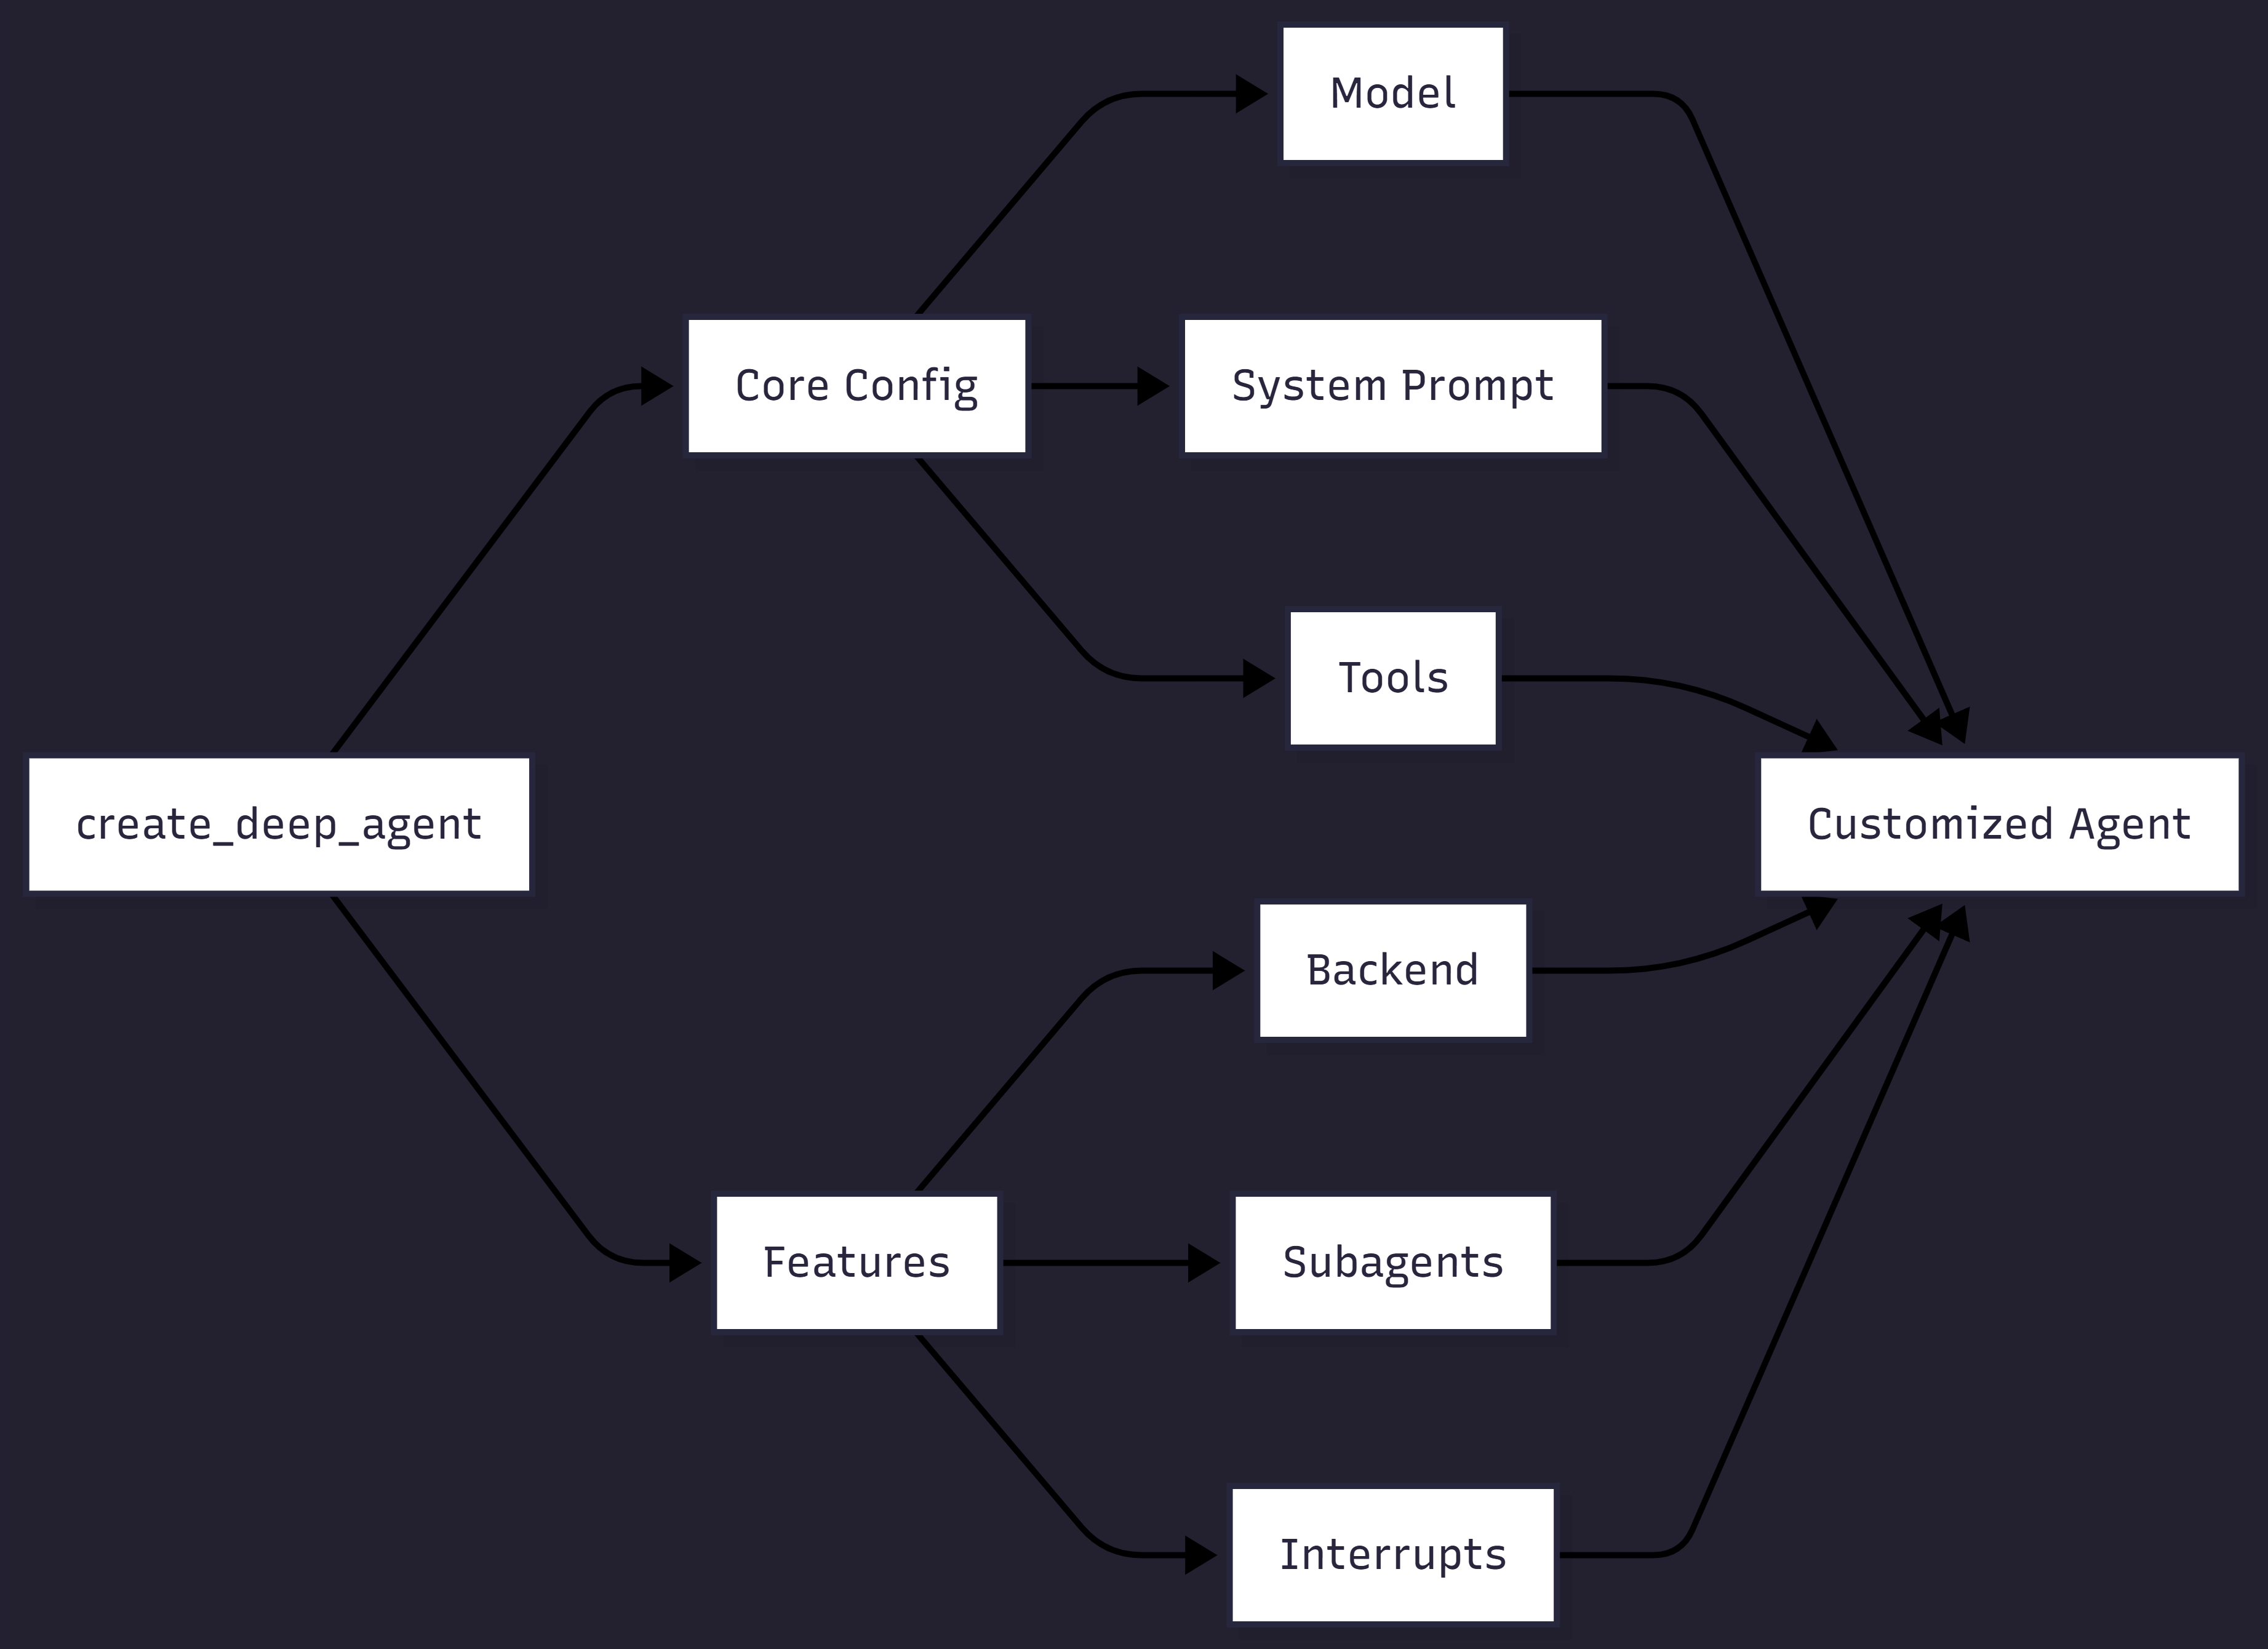

## Model

In [1]:
from langchain.chat_models import init_chat_model
from deepagents import create_deep_agent

model = init_chat_model(model="google_genai:gemini-2.5-flash")
agent = create_deep_agent(model=model)

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


## System prompt

In [2]:
from deepagents import create_deep_agent

research_instructions = """\
You are an expert researcher. Your job is to conduct \
thorough research, and then write a polished report. \
"""

agent = create_deep_agent(
    model="google_genai:gemini-2.5-flash",
    system_prompt=research_instructions,
)

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


## Tools

In [3]:
import os
from typing import Literal
from tavily import TavilyClient
from deepagents import create_deep_agent

tavily_client = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

def internet_search(
    query: str,
    max_results: int = 5,
    topic: Literal["general", "news", "finance"] = "general",
    include_raw_content: bool = False,
):
    """Run a web search"""
    return tavily_client.search(
        query,
        max_results=max_results,
        include_raw_content=include_raw_content,
        topic=topic,
    )

agent = create_deep_agent(
    tools=[internet_search]
)

## Skills

In [7]:
from urllib.request import urlopen
from deepagents import create_deep_agent
from langgraph.checkpoint.memory import MemorySaver

checkpointer = MemorySaver()

skill_url = "https://raw.githubusercontent.com/langchain-ai/deepagentsjs/refs/heads/main/examples/skills/langgraph-docs/SKILL.md"
with urlopen(skill_url) as response:
    skill_content = response.read().decode('utf-8')

skills_files = {
    "/skills/langgraph-docs/SKILL.md": skill_content
}

agent = create_deep_agent(
    model="groq:openai/gpt-oss-20b",
    skills=["./skills/"],
    checkpointer=checkpointer,
)

result = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "What is langgraph?",
            }
        ],
        # Seed the default StateBackend's in-state filesystem (virtual paths must start with "/").
        "files": skills_files
    },
    config={"configurable": {"thread_id": "12345"}},
)

In [8]:
print(result['messages'][-1].content)

**LangGraph** is a framework developed by the LangChain team that lets you design, build, and run complex, multi‑step workflows (or “graphs”) that combine language models with other tools, APIs, databases, and custom logic.

### Core ideas

| Feature | What it does |
|---------|--------------|
| **Graph definition** | You describe a workflow as a directed graph where nodes are *tasks* (e.g., “ask LLM”, “call API”, “store data”) and edges specify the flow of data. |
| **State management** | The graph keeps a single “state” object that flows through the nodes, making it easy to share context, store intermediate results, or back‑track. |
| **LLM integration** | Any node can invoke an LLM (OpenAI, Anthropic, etc.) using a prompt template that can reference the current state. |
| **Tool calling** | Nodes can call external APIs or custom functions, and the results are fed back into the graph. |
| **Modularity & reusability** | You can package common sub‑graphs as reusable components. |
| **E